# Sunborn(Luxury Brand) - Customer Churn Prediction


# About Sunborn

A family business group spanning to 5 decades . Sunborn own and operate leading hospitality mostly Yatch Hospitality, engage in innovative maritime construction and development, operate and own healthcare assets, manage and own real-estate in diverse sectors. 

With increasing competition and market saturation, retaining existing customers has become crucial, as acquiring new ones is significantly more costly. Research has highlighted that retaining customers can lead to substantial profit increases, making it essential for businesses to invest in customer retention strategies.


# Classification Problem

The task is to predict whether a customer will continue living in their rental yatch  or vacate (i.e., churn). This model could be critical for luxury real estateand maritime  hospitality developers  to understand customer behavior and implement retention strategies

  
  The project aims to:

- Identify key features influencing customer churn.
- Develop an accurate predictive model for churn classification.
- Recommend strategies for customer retention.

                    
Key research questions include :
                    
- Identifying significant predictors of churn,
- The accuracy of predictions
- The relationship between service features and customer retention strategies.
        
By focusing on these areas, the project seeks to help Sunborn  effectively mitigate customer churn and enhance overall business performance.

# The Data

The data obtained from Kaggle: [Customer Churn Dataset](kaggle/input/sunborn-customer-churn/customer_churn_large_dataset.csv')

Data consists of the below column features:

`CustomerID`- Unique identifier

`Name`- Client name 

`Age`- Client Age minimum being 18 years

`Gender`- Either Male or Female

`Location`- A state in USA

`Subscription_Length_Months`- How long the client has used the Yatch premises

`Monthly_Bill`- monthly rent charged

`Total_Usage_GB` - Total amount in Sterling pounds

`Churn` -Whether a client left or not 0(still present) 1(left)


### Data Preparation and Cleaning

We will import all the necessary libraries, load the dataset using pandas library, preview the data (how many features and records, as well as statistical features), and conduct thorough data preprocessing (checking and removing any missing values and transforming data)


In [25]:
#importing all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix, roc_curve, roc_auc_score
%matplotlib inline
sns.set(style='whitegrid')

In [26]:
#load the dataset
df = pd.read_csv('customer_churn_large_dataset.csv')

df.head() #print first 5 rows of the dataframe


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [27]:
# Check for missing values
print(df.isnull().sum())


CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


In [28]:
#Check for duplicate rows
print(df.duplicated().sum())


0


In [29]:
# Explore data in summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [30]:
#Summary Statistics
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [31]:
#dropping unnnecessary columns
df = df.drop(['CustomerID', 'Name'], axis=1)


In [32]:
#copying original dataframe for contigency incase of dataleakage before analysis
copied_df = df.copy()



### Univariate Analysis 

C:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


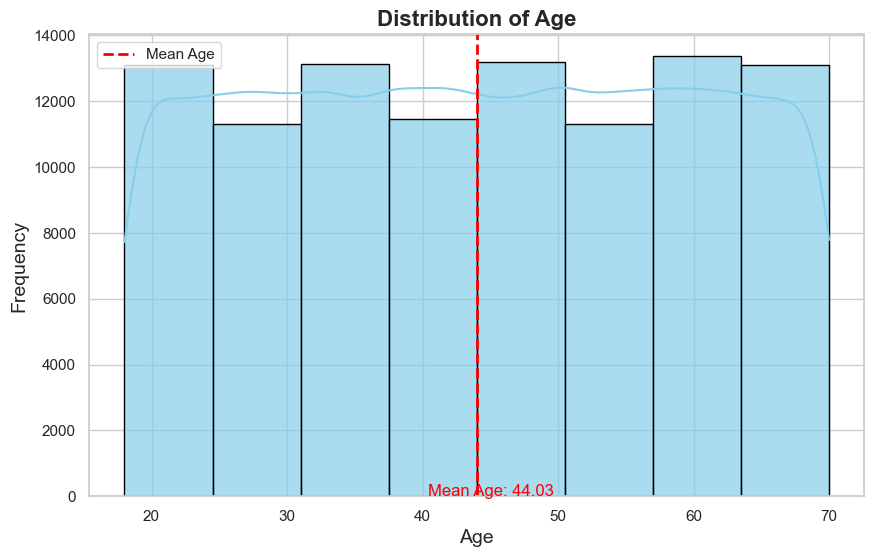

Mean Age: 44.03
Standard Deviation: 15.28
Median Age: 44.00
Variance: 233.49


In [33]:
# Calculate and print statistics for Age 
mean_age = df['Age'].mean()
std_age = df['Age'].std()
median_age = df['Age'].median()
variance_age = df['Age'].var()
max_age = df['Age'].max()



# Histogram for Age
df['age_bracket'] = pd.cut(df['Age'], bins=[-1, 20, 30, 40, 50, 60, 70, 80], labels=['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Set the style for the plot
sns.set(style='whitegrid', palette='pastel')

# Plot the histogram with mean age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=8, kde=True, color='#87CEEB', edgecolor='black', alpha=0.7)
plt.axvline(mean_age, color='#FF0000', linestyle='--', linewidth=2, label='Mean Age')
plt.text(mean_age + 1, 1, f"Mean Age: {mean_age:.2f}", color='#FF0000', fontsize=12, ha='center')
plt.title('Distribution of Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True)
plt.show();

print(f"Mean Age: {mean_age:.2f}")
print(f"Standard Deviation: {std_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Variance: {variance_age:.2f}")

C:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


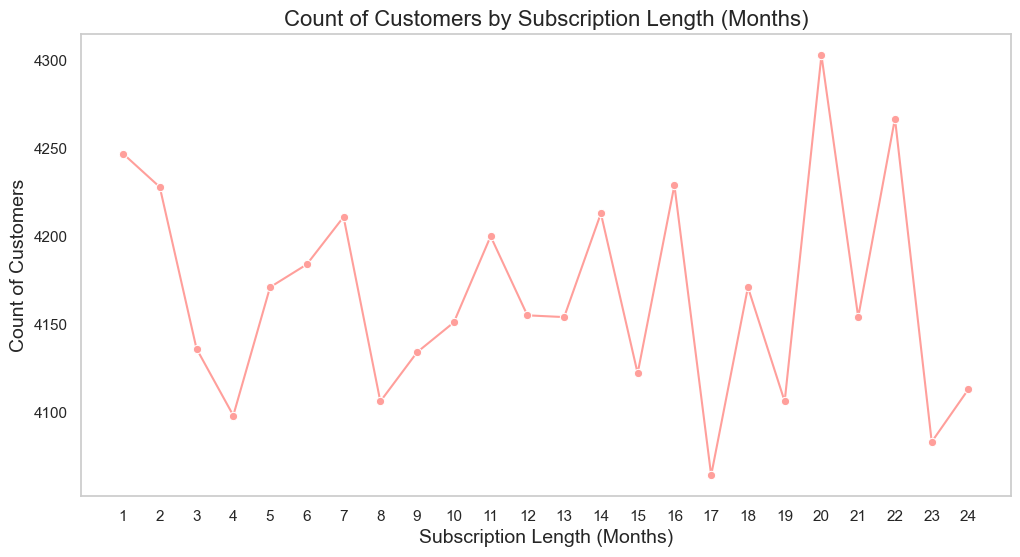

Mean: 12.49
Median: 12.00
Max: 24.00
Min_usage: 1.00


In [34]:
#Subscription trends


subscription_counts = df['Subscription_Length_Months'].value_counts().sort_index()

subscription_mean = df['Subscription_Length_Months'].mean()
subscription_median = df['Subscription_Length_Months'].median()
subscription_max = df['Subscription_Length_Months'].max()
subscription_min = df['Subscription_Length_Months'].min()


# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=subscription_counts.index, y=subscription_counts.values, marker='o', color='r')

# Add titles and labels
plt.title('Count of Customers by Subscription Length (Months)', fontsize=16)
plt.xlabel('Subscription Length (Months)', fontsize=14)
plt.ylabel('Count of Customers', fontsize=14)

# Show the plot
plt.grid()
plt.xticks(subscription_counts.index)  
plt.show();
print(f'Mean: {subscription_mean:.2f}')
print(f'Median: {subscription_median:.2f}')
print(f'Max: {subscription_max:.2f}')
print(f'Min_usage: {subscription_min:.2f}')


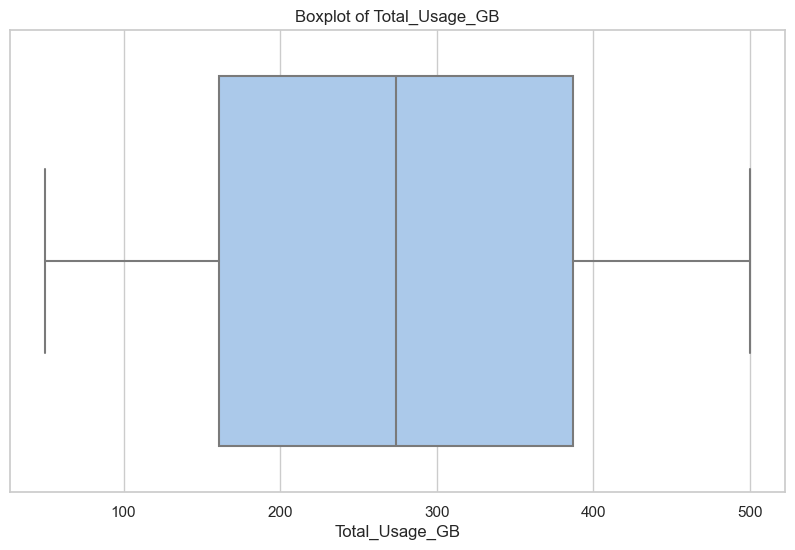

Mean: 274.39
Median: 274.00
Max: 500.00
Variance: 17020.61
Std: 130.46
Min_usage: 50.00


In [35]:
# Boxplot for Monthly Bill

# Calculate statistics
mean = df['Total_Usage_GB'].mean()
median = df['Total_Usage_GB'].median()
max_value = df['Total_Usage_GB'].max()
variance = df['Total_Usage_GB'].var()
std = df['Total_Usage_GB'].std()
min_value = df['Total_Usage_GB'].min()

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total_Usage_GB'])


# Add titles and labels
plt.title('Boxplot of Total_Usage_GB')
plt.xlabel('Total_Usage_GB')
plt.show();

#Print the statistics
print(f'Mean: {mean:.2f}')
print(f'Median: {median:.2f}')
print(f'Max: {max_value:.2f}')
print(f'Variance: {variance:.2f}')
print(f'Std: {std:.2f}')
print(f'Min_usage: {min_value:.2f}')


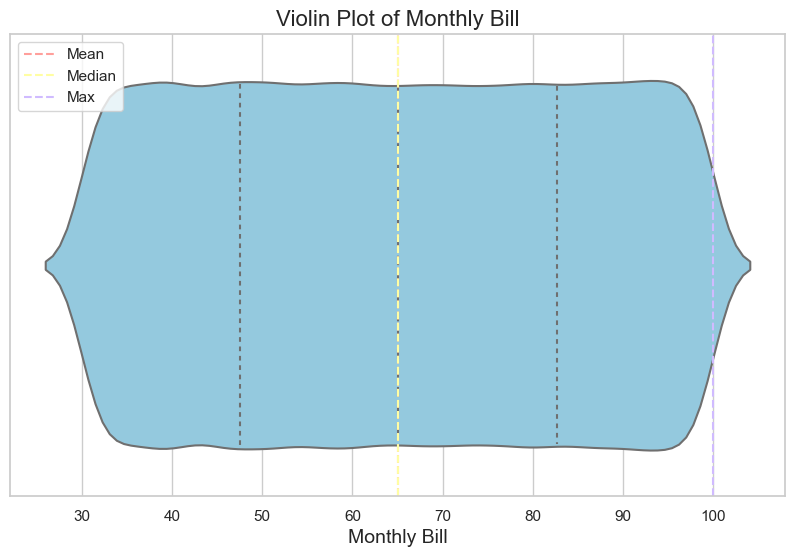

Mean: 65.05
Median: 65.01
Max: 100.00
Variance: 409.28
Min: 30.00


In [36]:
# Calculate statistics
mean = df['Monthly_Bill'].mean()
median = df['Monthly_Bill'].median()
max_value = df['Monthly_Bill'].max()
variance = df['Monthly_Bill'].var()
min = df['Monthly_Bill'].min()

#Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Monthly_Bill'], color='skyblue', inner='quartile')

# Add horizontal lines for mean, median, and max
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='y', linestyle='--', label='Median')
plt.axvline(max_value, color='m', linestyle='--', label='Max')

# Add titles and labels
plt.title('Violin Plot of Monthly Bill', fontsize=16)
plt.xlabel('Monthly Bill', fontsize=14)
plt.legend()

# Show the plot
plt.show()


# Print the statistics
print(f'Mean: {mean:.2f}')
print(f'Median: {median:.2f}')
print(f'Max: {max_value:.2f}')
print(f'Variance: {variance:.2f}')
print(f'Min: {min:.2f}')

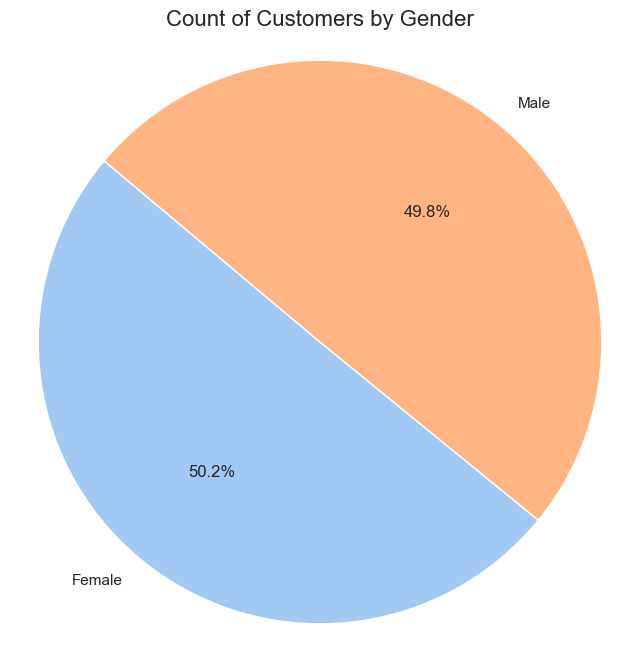

In [37]:
# Count the number of customers by Gender

gender_counts = df['Gender'].value_counts()

# Create a pie chart

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Count of Customers by Gender', fontsize=16)
plt.axis('equal')  


plt.show();


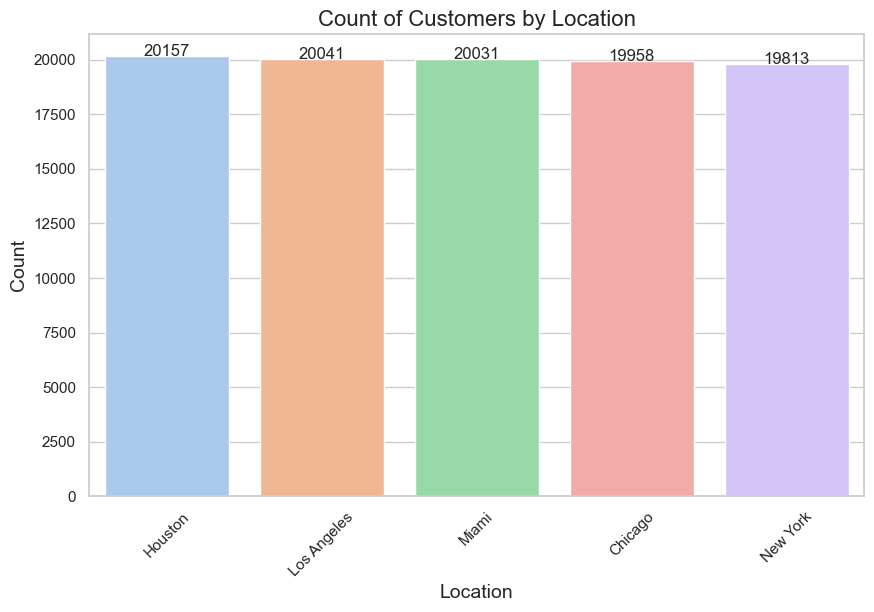

In [38]:
#  count of customers by Location
location_counts = df['Location'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='pastel')

# Add titles and labels
plt.title('Count of Customers by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Annotate the counts on top of the bars
for i, count in enumerate(location_counts):
    plt.text(i, count + 1, count, ha='center', fontsize=12)

# Show the plot
plt.xticks(rotation=45) 
plt.show();

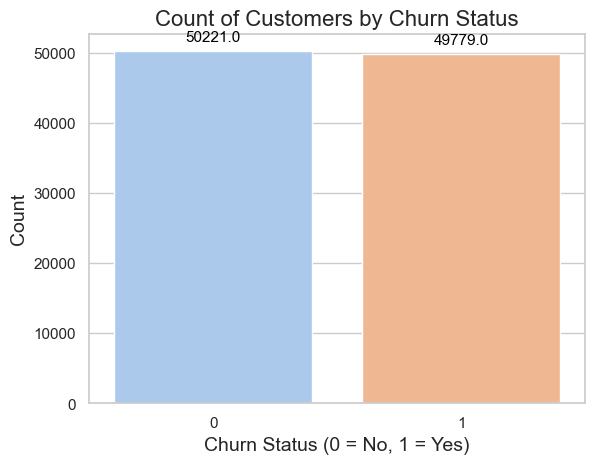

In [39]:
# Count plot for Churn

count_plot = sns.countplot(data=df, x='Churn', palette='pastel')

# Annotate the counts on top of the bars
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5),  textcoords='offset points')

# Add titles and labels
plt.title('Count of Customers by Churn Status', fontsize=16)
plt.xlabel('Churn Status (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show();

#### Observations
- This is a balanced dataset(non-churn = 50,221 churn 49,779)- Sunborn looses almost 50% of their acquired  clients
  
- Most clients are female
  
- Average monthly bill is GBP 65

- Average total income is GBP 274
  
- Average client age clientele is 44 years

- Average client usage is 12 months max being 24 months

- Most of the companies Clientele comes from Houston State and Los Angeles.


### Bivariate Analysis (Features against Target Variable)

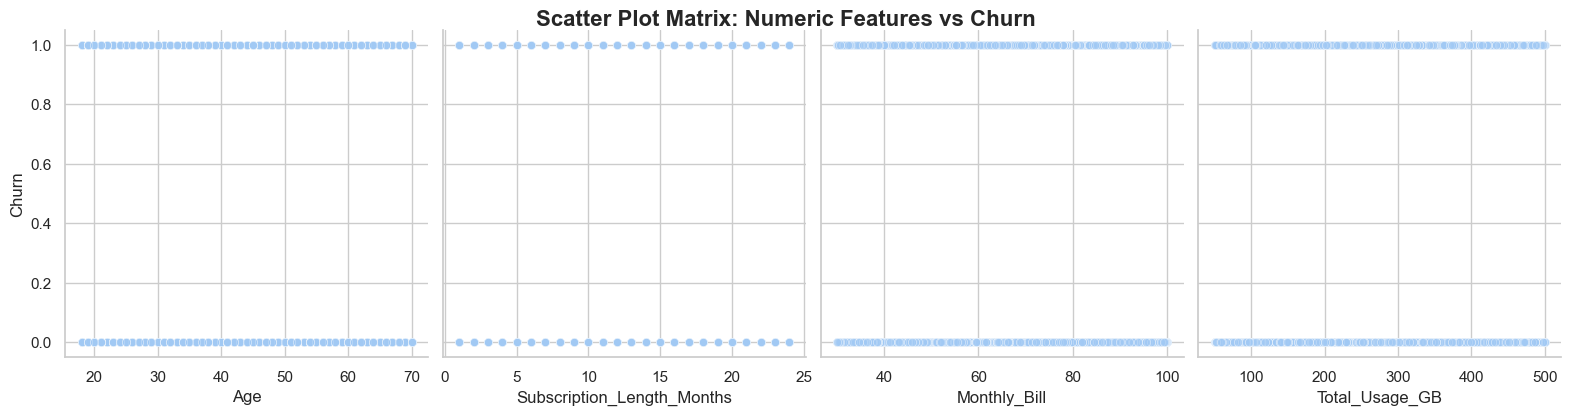

In [40]:
#Create scatterplots

sns.pairplot(df,x_vars =['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB'],y_vars ='Churn',kind = 'scatter',height =4, aspect = 1,markers='o', plot_kws={'alpha': 0.6, 'edgecolor': 'w'})

# Add a title to the plot
plt.suptitle('Scatter Plot Matrix: Numeric Features vs Churn', y=1.02, fontsize=16, fontweight='bold')

# Show the plot
plt.show();


### Multivariate Analysis 

In [41]:
#numerical columns
numerical_columns = df.select_dtypes(include ='number').copy()

#Converting Categorical features into numerical for Multivariate analysis

categorical_columns = df[['Gender','Location']].copy()

ohe = OneHotEncoder(sparse_output=False, dtype ='int')

ohe_categorical_columns = pd.DataFrame(ohe.fit_transform(categorical_columns),index = categorical_columns.index,columns = ohe.get_feature_names_out(categorical_columns.columns))

#concating the two dataframes into one 
numeric_df = pd.concat([numerical_columns,ohe_categorical_columns], axis = 1)

correlation_matrix = numeric_df.corr()

print(correlation_matrix['Churn'])


Age                           0.001559
Subscription_Length_Months    0.002328
Monthly_Bill                 -0.000211
Total_Usage_GB               -0.002842
Churn                         1.000000
Gender_Female                -0.002121
Gender_Male                   0.002121
Location_Chicago              0.000506
Location_Houston             -0.006728
Location_Los Angeles         -0.004807
Location_Miami                0.005235
Location_New York             0.005835
Name: Churn, dtype: float64


#### Observation
No significant correlation or linearity among predictor features against Target Feature

#### Log Transformation of Predictor(various features) against  Response (Churn) Variable to reconfirm linearity before choosing the classification model
If the relationship between the predictor and response variables is multiplicative or exponential, taking the logarithm of one or both variables can transform it into an additive or linear relationship.

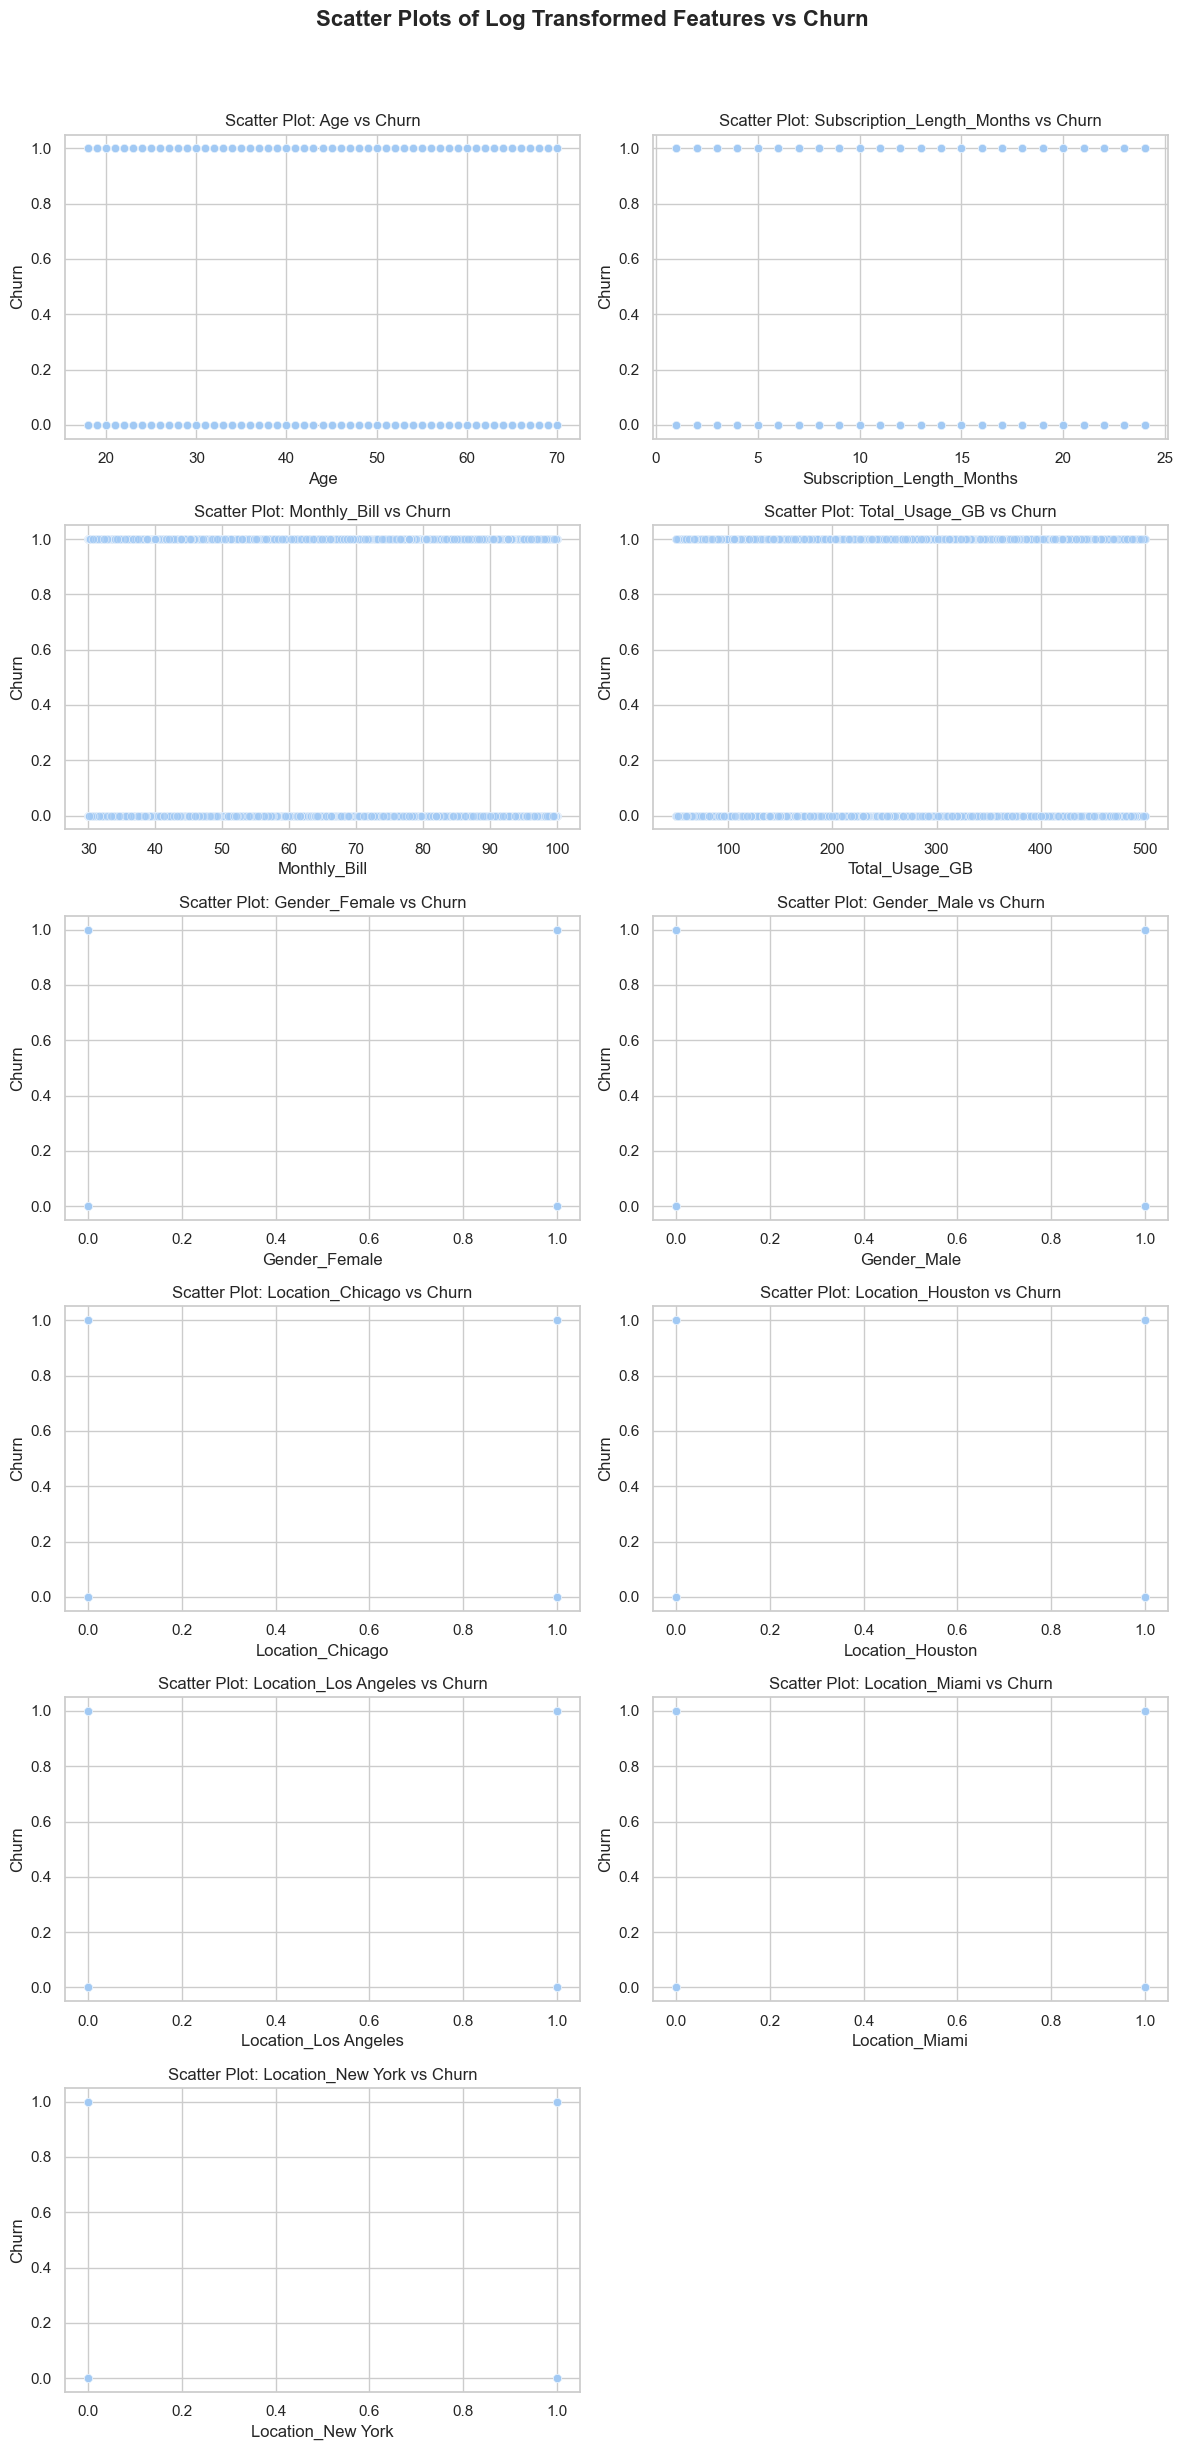

In [42]:
#creating variables X and y

X = numeric_df.drop(columns =['Churn']).copy()
y = numeric_df['Churn']

# Apply log transformation
log_X = np.log1p(X)  # Adding 1 to avoid log 0
log_y = np.log1p(y)  

#Create a figure with subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 24))  

axes = axes.flatten()  # Flatten the 2D array of axes

# Create scatter plots for each feature against Churn

for i, col in enumerate(log_X.columns):
    sns.scatterplot(data=numeric_df, x=col, y='Churn', ax=axes[i], alpha=0.6, edgecolor='w')
    axes[i].set_title(f'Scatter Plot: {col} vs Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Churn')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a main title
plt.suptitle('Scatter Plots of Log Transformed Features vs Churn', fontsize=16, fontweight='bold', y=1.02)

# Show the plot
plt.tight_layout()
plt.show();



#### No Linearity Observed from the transformed scatter plots.
We will the proceed to use the Decision Tree Classification Model

### Normalization

In [43]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### Create Baseline Model


In [44]:
#Fit baseline Model
clf = DecisionTreeClassifier(random_state = 42)

#Train  the model 
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluate the Model

In [45]:
#Evaluate the model on the train and test set
accuracy_train = clf.score(X_train_scaled, y_train)
accuracy_test = clf.score(X_test_scaled, y_test)
print(f"Accuracy train: {accuracy_train:.2f}")
print(f"Accuracy test: {accuracy_test:.2f}")

# Make predictions on the train and test set
y_pred_train = clf.predict(X_train_scaled)
y_pred_test = clf.predict(X_test_scaled)

# Generate and print the confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix_train:")
print(conf_matrix_train)
print("Confusion Matrix_test:")
print(conf_matrix_test)

# Print classification report
print("\nClassification Report_train:")
print(classification_report(y_train, y_pred_train))
print("\nClassification Report_test:")
print(classification_report(y_test, y_pred_test))


Accuracy train: 1.00
Accuracy test: 0.50
Confusion Matrix_train:
[[40142     0]
 [    0 39858]]
Confusion Matrix_test:
[[5042 5037]
 [4942 4979]]

Classification Report_train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40142
           1       1.00      1.00      1.00     39858

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000


Classification Report_test:
              precision    recall  f1-score   support

           0       0.51      0.50      0.50     10079
           1       0.50      0.50      0.50      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



### Evaluating the Metrics

 The test accuracy is only 50%, indicating that the model is not generalizing well to unseen data.

This discrepancy suggests overfitting, where the model has learned the training data too well, including noise and outliers, but fails to perform adequately on new data.
    
True Negatives (TN): 5,031 (correctly predicted class 0)

False Positives (FP): 5,048 (incorrectly predicted class 1)

False Negatives (FN): 4,896 (incorrectly predicted class 0)

True Positives (TP): 5,025 (correctly predicted class 1)

The test confusion matrix indicates a significant number of misclassifications.

The model is struggling to differentiate between the two classes, leading to a high number of false positives and false negatives.

The training confusion matrix shows that the model perfectly classified all training examples, with no misclassifications.

Test Classification Report:

- Precision for class 0: 0.51, for class 1: 0.50

- Recall for class 0: 0.50, for class 1: 0.51

- F1-score for both classes: 0.50

The test report shows that the model's performance is poor on unseen data, with both precision and recall around 50%. 

This indicates that the model is not effectively distinguishing between the two classes.

#### To Address Overfitting


1.Pruning the Decision Tree: 

Limit the depth of the tree by setting the max_depth parameter. 

2.Increase Minimum Samples for Splits and Leaves:

Adjusting parameters such as min_samples_split and min_samples_leaf to require a minimum number of samples for a split or leaf node, will help generalize better.

Will use GridSearchCv.


                        
3.Feature Engineering:
    
Review Features:  Consider removing irrelevant or noisy features thinking of  avoid scaling the data ..will make dataset and model simpler not complex


#### Model two

In [ ]:
from sklearn.model_selection import  GridSearchCV
# Split the data into features (X) and target (y)
X_best = numeric_df.drop('Churn', axis=1)  # Replace 'target_column' with your target variable name
y_best = numeric_df['Churn']

# Split the data into training and testing sets
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y_best, test_size=0.2, random_state=42)

#
# Create the decision tree classifier with specified parameters

dt_clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {'criterion': ['gini'],'max_depth': [None, 10, 20, 30, 40],'min_samples_split': [2, 10, 20,30],'min_samples_leaf': [1, 5, 10, 15]}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),param_grid=param_grid,cv=5,n_jobs=-1,verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_best, y_train_best)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy_train_best = best_model.score(X_train_best, y_train_best)
accuracy_test_best = best_model.score(X_test_best,y_test_best)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy train: {accuracy_train_best:.2f}")
print(f"Accuracy test: {accuracy_test_best:.2f}")

# Make predictions on the train and test set
y_pred_train_best = best_model.predict(X_train_best)
y_pred_test_best = best_model.predict(X_test_best)

# Generate and print the confusion matrix
conf_matrix_train_best = confusion_matrix(y_train_best, y_pred_train_best)
conf_matrix_test_best = confusion_matrix(y_test_best, y_pred_test_best)
print("Confusion Matrix_train_best:")
print(conf_matrix_train_best)
print("Confusion Matrix_test_best:")
print(conf_matrix_test_best)

# Print classification report
print("\nClassification Report_train_best:")
print(classification_report(y_train_best, y_pred_train_best))
print("\nClassification Report_test_best:")
print(classification_report(y_test_best, y_pred_test_best))



#### Evaluation

Training Performance

The model achieves a reasonably good accuracy of 0.62 on the training set, which is not too as previous baseline model high to indicate severe overfitting.

Test Performance

The model achieves a much lower accuracy of 0.50 on the test set, which is significantly lower than the training accuracy.

The confusion matrix for the test set shows a more imbalanced distribution compared to the training set, with higher false positives and false negatives.

The classification report for the test set shows a drop in precision, recall, and F1-score for both classes compared to the training set.

Avoiding scaling the data did not improve the test data


#### Final Model

In [47]:

#Splitting the data into training and testing sets

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the features
scaler = StandardScaler()
X_train_scaled_final = scaler.fit_transform(X_train)
X_test_scaled_final = scaler.transform(X_test)

#Fit final Model
clf = DecisionTreeClassifier(random_state = 42,criterion = 'gini', max_depth = 20,min_samples_leaf= 10, min_samples_split= 2 )

#Train  the model 
clf.fit(X_train_scaled_final, y_train_final)


#Evaluate the model on the  test set

accuracy_test_final = clf.score(X_test_scaled_final, y_test)

print(f"Accuracy test: {accuracy_test_final:.2f}")

# Make predictions on the  test set

y_pred_test_final = clf.predict(X_test_scaled_final)

# Generate and print the confusion matrix

conf_matrix_test_final = confusion_matrix(y_test_final, y_pred_test_final)

print("Confusion Matrix_test:")
print(conf_matrix_test_final)

# Print classification report

print("\nClassification Report_test_final:")
print(classification_report(y_test_final, y_pred_test_final))


Accuracy test: 0.50
Confusion Matrix_test:
[[4788 5291]
 [4778 5143]]

Classification Report_test_final:
              precision    recall  f1-score   support

           0       0.50      0.48      0.49     10079
           1       0.49      0.52      0.51      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [ ]:
# Plot the decision tree

fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3),dpi = 300)
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show();


### Model Performance against Objectives 

#### Metrics


**Accuracy Test:** 0.50

**Confusion Matrix:**

True Positives (TP): 5143

True Negatives (TN): 4788

False Positives (FP): 5291

False Negatives (FN): 4778

**Classification Report:**
              precision   recall  f1-score  support

           0       0.50      0.48      0.49     10079
           1       0.49      0.52      0.51      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000




#### Objectives Evaluation


**Identify Key Features Influencing Customer Churn:**

The current model’s performance does not provide clear insights into the key features influencing churn due to its low accuracy and balanced precision and recall.Although exhaustive hyperparameter tuning technique was applied the GridSearchCV.

Further feature importance analysis or using more sophisticated models like Random Forests or Gradient Boosting might help identify significant predictors.

**Develop an Accurate Predictive Model for Churn Classification:**

The model’s accuracy of 0.50 indicates it performs no better than random guessing.
    
This suggests the need for trying different algorithms.
                      
**Recommend Strategies for Customer Retention:**

With the current model’s performance, it is challenging to derive actionable insights for customer retention strategies.
    
Improving the model’s predictive power is crucial before making reliable recommendations.





#### Key Research Questions


**Identifying Significant Predictors of Churn:**

The model needs to be refined to accurately identify significant predictors. 
    
Complex Techniques like feature importance analysis and SHAP values can be useful once a better-performing model is developed.

**The Accuracy of Predictions:**

The current accuracy of 0.50 is insufficient for reliable predictions. 

Enhancing the model’s accuracy is essential to meet this objective.

**The Relationship Between Service Features and Customer Retention Strategies:**

The model’s current performance does not provide clear insights into the relationship between service features and retention strategies.

A more accurate model is needed to explore these relationships effectively.

#### Recommendations for Improvement


Algorithm Selection: We should consider trying more complex models like Random Forests, Gradient Boosting, or Neural Networks.

Data Augmentation:
    
Collect More Data: Increase the dataset size to improve model training.


# Conclusion

There is need for additional data eg accomodation type, reservation type ,Sunborn to provide addtional data 

A much more complex algorithm is needed and not a DecisionTreeClassifier or LogisticRegression Model(as the features do not exhibit linearity)

By addressing these areas, you can work towards developing a more accurate predictive model for customer churn and derive actionable insights for retention strategies. 